# ST445 Managing and Visualizing Data
## Model Evaluation
### Milan Vojnovic and Christine Yuen, MT 2017
---

#  Model Evaluation

This notebook is about performance of classifiers for the task of recognizing one's gender based on a recording of his or her voice. We use a dataset from the Kaggle competition "Gender recognition by voice" that is available from [here](https://www.kaggle.com/primaryobjects/voicegender).

Since our focus is on model evaluation, you do not need to write the code for generation of predictions. We have written this code for you. This code is standard in the context of prediction tasks where one typically tries out different models. You only need to check your understanding for this part of the code by answering a few questions. 

The main goal of this notebook is to compare the performance of different binary classifiers by using model evaluation metrics and visualisation methods introduced in the lecture.

The code in the next cell is just to disable the auto-scrolling in the cells of this notebook.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

## Preparation

### Loading libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

# libraries for model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### Loading data

In [3]:
# import data
voice = pd.read_csv("voice.csv")
y = voice.label=='male'
X = voice.drop(['label'], axis=1)

voice.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Dividing the data into train and test sets

In [4]:
# fix the random seed for reproducibility
np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

### Computing the prediction probabilities using different classifiers

In [5]:
classifier_names = ["Logistic Regression",
                    "Nearest Neighbors", 
                    "Linear SVM", 
                    "RBF SVM",
                    "Random Forest",
                    "AdaBoost"]

classifiers = [LogisticRegression(C=1., solver='lbfgs'),
               KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025, probability=True),
               SVC(gamma=2, C=1, probability=True),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               AdaBoostClassifier()]

pred_prob = {}
pred = {}

# fit individual classifiers
for name, classifier in zip(classifier_names, classifiers):
    np.random.seed(100)
    classifier.fit(X_train,y_train)
    pred_prob[name] = classifier.predict_proba(X_test)[:,1]
    pred[name] = np.where(pred_prob[name] >= 0.5, 1, 0)

### Check point:
Read the code above and answer the following questions:

1. What does  ```train_test_split(X, y, test_size=.5, random_state=0)``` do?
2. What does ```classifier.fit(X_train,y_train)``` do?
3. What does ```pred_prob``` store?

### Answer:

1. It separates the data into train set and test sets. Train set is used to fit data. Test set is used to calculate the fit performance.
2. It fits the train data with all the methods stored in ```classifiers```
3. It stores the fitted probability.

## Evaluating the performance of different binary classifiers 

You may find the following useful: http://scikit-learn.org/stable/modules/model_evaluation.html.


## 1. Evaluating the performance of single classifier

Your first task it so evaluate the performance of the logistic regression classifer.
 
1. Compute the confusion matrix. Check whether the classes of the input examples are balanced. 
2. Compute the accuracy metric.
3. Compute the ROC point for the decision threshold $\theta$ = 0.5. Plot this point in the ROC space by using the quantities that you have computed in item 1. Discuss. 
4. Plot the ROC curve. Discuss.
5. Plot the PR curve. Compare the ROC and PR curves and discuss (Homework).
6. Compute the AUC metric. Discuss.

Hints: You may want to use the following functions [confusion_matrix()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [roc_curve()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve), [precision_recall_curve()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve), and [auc()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc).

1. confusion matrix:

[[646 126]
 [ 36 776]]

 [# negative examples, # positive examples] =  [772 812]

2. accuracy: 0.898

3. ROC point:



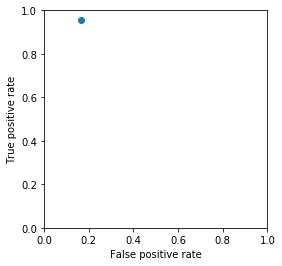


4. ROC curve:



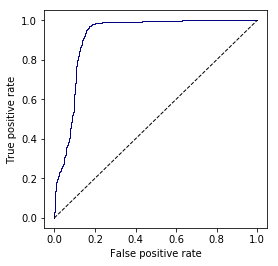

6. AUC: 0.918897878966


In [6]:
# 1. confusion matrix
print("1. confusion matrix:\n")
cm = confusion_matrix(y_test, pred['Logistic Regression'])
print(cm)

print("\n [# negative examples, # positive examples] = ", np.sum(cm,1))

# 2. accuracy 
print("\n2. accuracy:", '%.3f' % accuracy_score(y_test, pred['Logistic Regression']))

# 3. ROC point
print("\n3. ROC point:\n")

tn, fp, fn, tp = cm.ravel()
fpr_pt = fp/(tn+fp)
tpr_pt = tp/(tp+fn)

plt.subplots(figsize=(4,4))
plt.plot(fpr_pt, tpr_pt,marker='o', label='Logistic Regression')

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show();

# 4. ROC curve
print("\n4. ROC curve:\n")

fpr, tpr, _ = roc_curve(y_test, pred_prob['Logistic Regression'])

plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, lw=1, color='navy')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show();

# 6. AUC
print("6. AUC:", auc(fpr, tpr))

### Homework Q1: plot the PR curve for the logistic regression classifier

Plot the PR curve using the ```precision_recall_curve()``` function. Compare the ROC and PR curves and discuss.

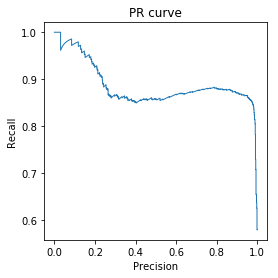

In [7]:
# code to remove

precision, recall, _ = precision_recall_curve(y_test,pred_prob['Logistic Regression'])

avg_precision = average_precision_score(y_test, pred_prob['Logistic Regression'])

plt.subplots(figsize=(4,4))

plt.plot(recall, precision, lw=1, label='PR curve of '+'Logistic Regression'+' (area = %0.2f)' % avg_precision);

plt.title("PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall");

## 2. Comparing the performance of different classifiers

### ROC curves of all classifiers in a single ROC space

In [8]:
def get_iterable(x):
    if isinstance(x, list):
        return x
    else:
        return [x]
    
def get_roc_pt(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fpr_pt = fp/(tn+fp)
    tpr_pt = tp/(tp+fn)
    return (np.array([fpr_pt, tpr_pt]));
        
def print_accuracy(y_test, y_pred, names):
    names = get_iterable(names)
    for name in names:
        acc = accuracy_score(y_test, y_pred[name])
        print(name+' acc: %0.3f' % acc)

def plot_roc(y_test, pred_prob, names, plot_size):
    plt.clf()
    fig = plt.figure(figsize=(plot_size,plot_size))
    ax = fig.add_subplot(1, 1, 1)
    
    names = get_iterable(names)
    for name in names:
        fpr, tpr, _ = roc_curve(y_test, pred_prob[name])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=1, label= name + ' (area = %0.3f)' % roc_auc)
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=9)
    plt.show();
    
    
def plot_pr(y_test, pred_prob, names, plot_size):
    plt.clf()
    fig = plt.figure(figsize=(plot_size,plot_size))
    ax = fig.add_subplot(1, 1, 1)
    
    names = get_iterable(names)
    for name in names:
        precision, recall, _ = precision_recall_curve(y_test,pred_prob[name])
        avg_precision = average_precision_score(y_test, pred_prob[name])
        ax.plot(recall, precision, lw=1, label=name + ' (area = %0.3f)' % avg_precision);
         
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.01])
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=9)
    plt.show(); 

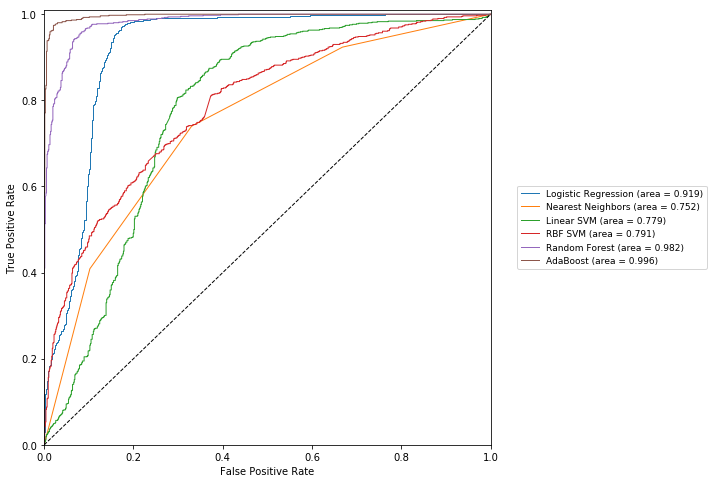

In [9]:
plot_roc(y_test, pred_prob, classifier_names,8);

### PR curves of all classifiers in a single PR space

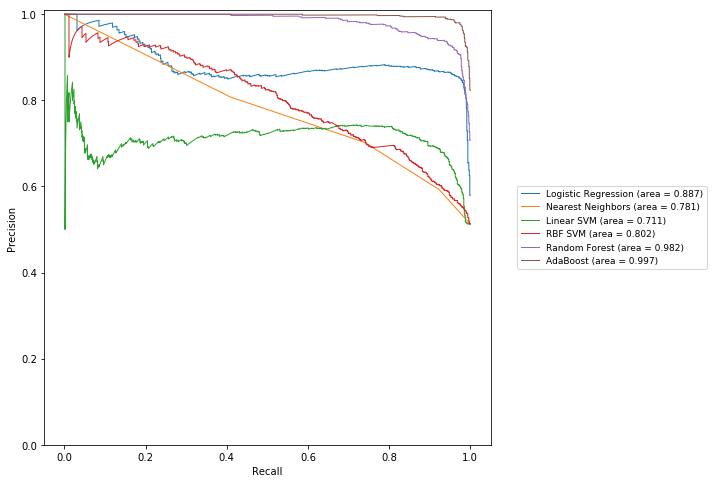

In [10]:
plot_pr(y_test, pred_prob, classifier_names,8);

## 3. Pairwise comparison of different classifiers

In the lecture we have noted that 

Claim 1: two ROC curves may overlap and be quite different while they have comparable AUC values. 

In this section we will see some examples that support this claim.

### Exercise: ROC pairwise comparisons

Compare the following pairs of classifiers in the ROC space:

* Linear SVM vs RBF SVM
* RBF SVM vs Nearest Neighbors
* AdaBoost vs Random Forest

Calculate the accuracy of the above methods as well. Discuss:

1. Is Claim 1 supported?
2. Does a ROC point provide you with the same information about the performance as the ROC curve?

### Answer:

1. Yes. Linear SVM vs RBF SVM has comparable AUC but their ROC curves are quite different.
2. No, for RBF SVM vs Nearest Neighbors, we are not able to conclude which method is better than another using the ROC point, but we can tell that RBF SVM is better by looking at the ROC curves.

In [11]:
# 1. compare accuracies
print_accuracy(y_test, pred, ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Random Forest', 'AdaBoost'])

Nearest Neighbors acc: 0.706
Linear SVM acc: 0.740
RBF SVM acc: 0.711
Random Forest acc: 0.937
AdaBoost acc: 0.972


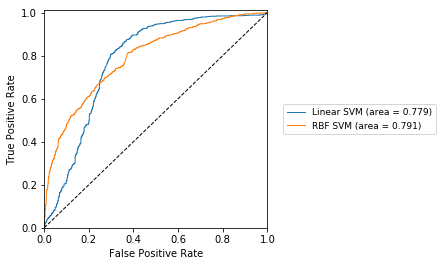

In [12]:
# 2. compare ROC
plot_roc(y_test, pred_prob, ['Linear SVM', 'RBF SVM'], 4)

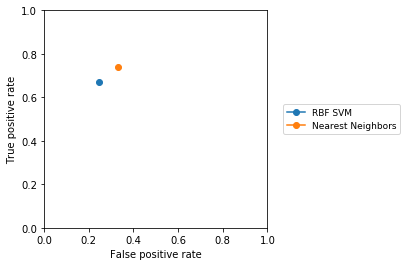

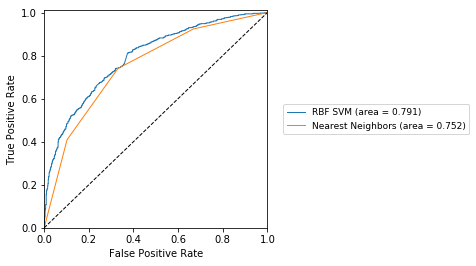

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, pred['RBF SVM']).ravel()
fpr_pt = fp/(tn+fp)
tpr_pt = tp/(tp+fn)

plt.subplots(figsize=(4,4))
plt.plot(fpr_pt, tpr_pt,marker='o', label='RBF SVM')
tn, fp, fn, tp = confusion_matrix(y_test, pred['Nearest Neighbors']).ravel()
fpr_pt = fp/(tn+fp)
tpr_pt = tp/(tp+fn)
plt.plot(fpr_pt, tpr_pt,marker='o', label='Nearest Neighbors')

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=9)
plt.show();

plot_roc(y_test, pred_prob, ['RBF SVM', 'Nearest Neighbors'], 4)

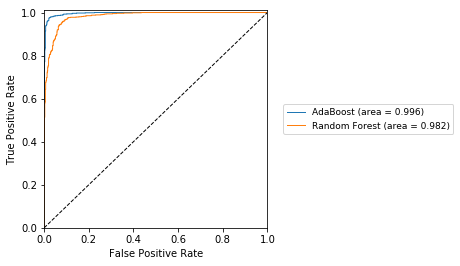

In [14]:
plot_roc(y_test, pred_prob, ['AdaBoost', 'Random Forest'], 4)

In the lecture, we have noted that

Claim 2: If a ROC curve dominates another ROC curve, the same dominance order holds also for the PR curves.

### Homework Q2: PR pairwise comparisons

Compare the following pairs of classifers in the PR space:

* Linear SVM vs RBF SVM
* RBF SVM vs Nearest Neighbors
* AdaBoost vs Random Forest

Discuss and compare the results with the corresponding ROC curves. Is Claim 2 supported by the above examples?

### Answer:

The relation holds for AdaBoost vs Random Forest. For the PR cuver of RBF SVM, Nearest Neighbors, some part of Nearest Neighbors dominates RBF SVM, but for ROC curve RBF SVM dominates Nearest Neighbors for the whole curve.

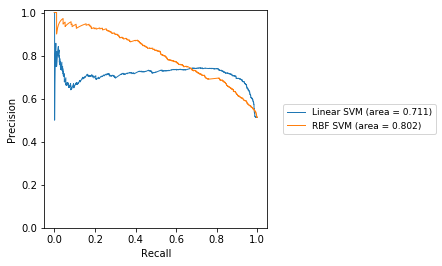

In [15]:
# 3. compare PR
plot_pr(y_test, pred_prob, ['Linear SVM', 'RBF SVM'], 4)

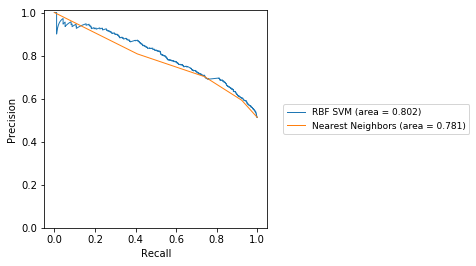

In [16]:
plot_pr(y_test, pred_prob, ['RBF SVM', 'Nearest Neighbors'], 4)

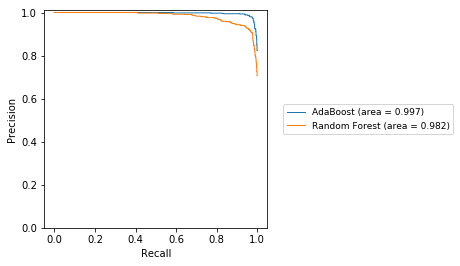

In [17]:
plot_pr(y_test, pred_prob, ['AdaBoost', 'Random Forest'], 4)